In [2]:
# install geopandas: conda install -c conda-forge geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import re

In [40]:
fp='NorthCarolinaVulnerability/NORTHCAROLINA.shp'

In [41]:
ncdata=gpd.read_file(fp)

Looking for certain counties

In [42]:
ctlist=list(ncdata['COUNTY'].unique())
ctlist.sort()
print(ctlist)

['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'McDowell', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', '

In [43]:
ctdata=ncdata[ctdata['COUNTY']=='Cumberland']

In [44]:
ctdata.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,geometry
3,37,NORTH CAROLINA,NC,37051,Cumberland,37051980100,"Census Tract 9801, Cumberland County, North Ca...",35.598407,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,5250.0,POLYGON ((-79.11285299999997 35.12591200000003...
382,37,NORTH CAROLINA,NC,37051,Cumberland,37051000200,"Census Tract 2, Cumberland County, North Carolina",2.614907,2148.0,213.0,...,1.0,0.0,1.0,7.0,326.0,101.0,15.2,4.6,3723.0,POLYGON ((-78.89540299999999 35.02078500000005...
383,37,NORTH CAROLINA,NC,37051,Cumberland,37051000500,"Census Tract 5, Cumberland County, North Carolina",1.698971,2231.0,200.0,...,1.0,0.0,1.0,5.0,354.0,69.0,16.1,2.9,3063.0,POLYGON ((-78.92230799999999 35.01844900000003...
384,37,NORTH CAROLINA,NC,37051,Cumberland,37051000600,"Census Tract 6, Cumberland County, North Carolina",1.958945,5573.0,497.0,...,0.0,0.0,0.0,0.0,666.0,314.0,12.4,5.5,6247.0,POLYGON ((-78.93500899999998 35.04437100000007...
385,37,NORTH CAROLINA,NC,37051,Cumberland,37051000701,"Census Tract 7.01, Cumberland County, North Ca...",2.456289,5539.0,389.0,...,0.0,0.0,0.0,0.0,323.0,128.0,5.9,2.3,7774.0,POLYGON ((-78.95479899999998 35.05937600000004...


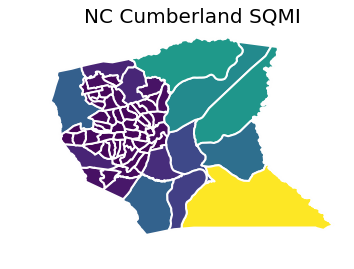

In [47]:
#plt.figure(figsize=(8,6))
ctdata.plot(column='AREA_SQMI',linewidth=2,edgecolor='2')
plt.title('NC Cumberland SQMI',fontsize=20)
plt.axis('off')
#plt.rcParams["figure.figsize"] = [8,6]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [5]:
nc_result_county['ct']=nc_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])
or_result_county['ct']=or_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])
ma_result_county['ct']=ma_result_county['county'].apply(lambda x: re.findall(r'(.+) County',x)[0])

In [6]:
#NC	37	NORTH CAROLINA
#OR	41	OREGON
#MA	25	MASSACHUSETTS

ncdata=ctdata[ctdata['STATEFP']=='37']
ordata=ctdata[ctdata['STATEFP']=='41']
madata=ctdata[ctdata['STATEFP']=='25']

In [7]:
ncctdata_all=ncdata.merge(nc_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')
orctdata_all=ordata.merge(or_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')
mactdata_all=madata.merge(ma_result_county[['ct','pop','total','rate']], left_on='NAME',right_on='ct',how='right')

In [ ]:
ncctdata_all.plot(column='pop')
ncctdata_all.plot(column='total')
plt.show()

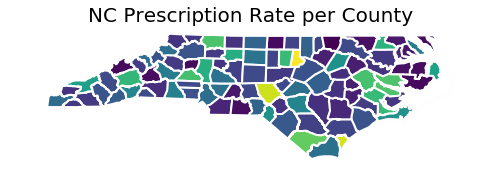

In [280]:
#plt.figure(figsize=(8,6))
ncctdata_all.plot(column='rate',linewidth=2,edgecolor='2')
plt.title('NC Prescription Rate per County',fontsize=20)
plt.axis('off')
#plt.rcParams["figure.figsize"] = [8,6]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [ ]:

    #plt.rcParams["figure.figsize"] = [19.2,10.8]
    #fig, ax = plt.subplots(1, figsize=(10, 6))
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plotdata=ncdata.merge(county_trx[county_trx['Product_Basename']==i],left_on='NAME',right_on='county',how='left')
    plotdata.plot(column='ctrate',cmap='viridis',ax=ax,linewidth=2,edgecolor='2')
    
    plt.title('{0} TRX Per Person'.format(i),fontsize=40,y=1.1)
    ax.axis('off')
    sm=plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(0,plotdata['ctrate'].max()))
    sm._A=[]
    fig.colorbar(sm, shrink=0.6)

    ax.annotate('Source: Blue6, 2018',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate {0}.png'.format(i),dpi=300)
plt.show()

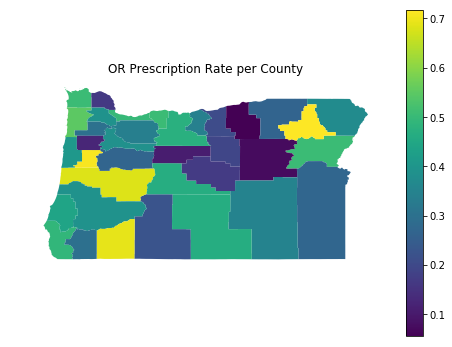

In [37]:
#plt.figure(figsize=(8,6))
orctdata_all.plot(column='rate',legend = True)
plt.title('OR Prescription Rate per County')
plt.axis('off')
plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
plt.savefig(r'E:\Bootcamp_Summer_Project\OR Rate.png',dpi=100)
plt.show()

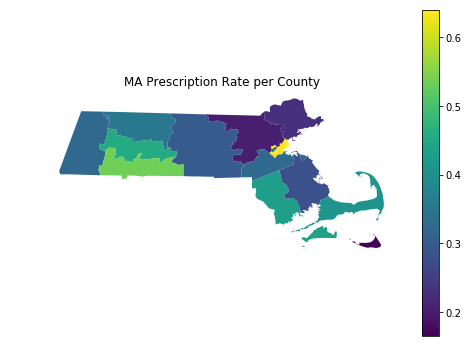

In [36]:
#plt.figure(figsize=(8,6))
mactdata_all.plot(column='rate',legend = True)
plt.title('MA Prescription Rate per County')
plt.axis('off')
plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
plt.savefig(r'E:\Bootcamp_Summer_Project\MA Rate.png',dpi=100)
plt.show()

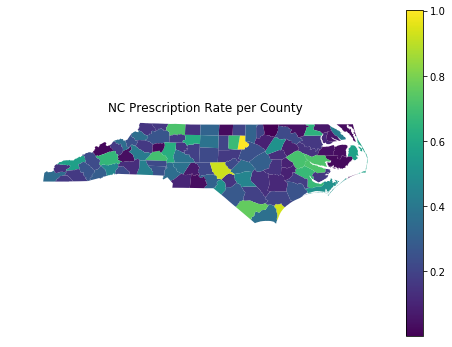

In [35]:
#plt.figure(figsize=(8,6))
ncctdata_all.plot(column='rate',legend = True)
plt.title('NC Prescription Rate per County')
plt.axis('off')
plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

# Trx map

In [40]:
#trx_df=sas_to_df(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\Original_Data\Data\rx_records_trx.sas7bdat')
#trx_df.to_csv(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\Original_Data\Data\rx_records_trx.csv')

In [65]:
trx_df=pd.read_csv(r'E:\Bootcamp_Summer_Project\Zhongshuai_Cao\Original_Data\Data\rx_records_trx.csv',dtype={'Zip':str,'Product_Group':int},index_col=0)

In [53]:
med_df=pd.read_csv('E:\Bootcamp_Summer_Project\Original_Data - Rename Files\Data\medication_details.csv')

## Get zip code county convert dataframe

In [168]:
zip_code_df=pd.read_csv('E:\Team_Data\zip_code_database.csv', dtype={'zip':str,'county':str},index_col=0)
zip_code_df=zip_code_df[['zip','state','county']]
zip_code_df=zip_code_df[zip_code_df['state'].isin(['NC','MA','OR'])]
zip_code_df['county']=zip_code_df['county'].astype(str).apply(lambda x: x if not re.search(r'County',x) else re.findall(r'(.+) County',x)[0])

In [ ]:
mergeddf=trx_df.merge(med_df[['PG','Product_Basename']].drop_duplicates(),left_on='Product_Group', right_on='PG', how='left').drop(['Product_Group','PG','PG_Name','Specialty','city'],axis=1)

In [173]:
mergeddf=mergeddf.merge(zip_code_df,left_on=('ST','Zip'),right_on=('state','zip'))

In [178]:
mergeddf=mergeddf.drop(['Zip','ST'],axis=1)

In [179]:
mergeddf.head()

,TRx_08312017,TRx_07312017,TRx_06302017,TRx_05312017,TRx_04302017,TRx_03312017,TRx_02282017,TRx_01312017,TRx_12312016,TRx_11302016,...,TRx_02292016,TRx_01312016,TRx_12312015,TRx_11302015,TRx_10312015,TRx_09302015,Product_Basename,zip,state,county
0,0.000,0.00,1.015,1.017,0.000,0.000,0.000,0.000,0.00,1.020,...,0.000,0.000,0.000,0.000,0.00,0.000,HYDROMORPHONE,02135,MA,Suffolk
1,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,1.003,0.000,0.000,0.00,0.000,OXYCODONE,02135,MA,Suffolk
2,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.00,0.000,NUCYNTA,02135,MA,Suffolk
3,3.117,2.04,2.015,2.017,3.404,5.024,8.147,6.477,6.43,6.497,...,7.414,8.598,7.771,11.728,4.05,7.473,OXYCONTIN,02135,MA,Suffolk
4,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.00,0.000,OXYCODONE,02135,MA,Suffolk


## Get trx county dataframe

In [203]:
trx_ct_df=mergeddf.groupby(['Product_Basename','state','county']).sum()
trx_ct_df['total']=trx_ct_df.sum(axis=1)
trx_ct_df=trx_ct_df.reset_index()
trx_ct_df=trx_ct_df[['Product_Basename','state','county','total']]

In [205]:
trx_ct_df.head()

,Product_Basename,state,county,total
0,ARYMO,MA,Barnstable,459.818
1,ARYMO,MA,Berkshire,407.297
2,ARYMO,MA,Bristol,1333.282
3,ARYMO,MA,Dukes,71.945
4,ARYMO,MA,Essex,1664.635


In [206]:
nc_trx_ct=ncdata.merge(trx_ct_df[trx_ct_df['state']=='NC'], left_on='NAME',right_on='county',how='right')

In [214]:
ma_trx_ct=ncdata.merge(trx_ct_df[trx_ct_df['state']=='MA'], left_on='NAME',right_on='county',how='right')
or_trx_ct=ncdata.merge(trx_ct_df[trx_ct_df['state']=='OR'], left_on='NAME',right_on='county',how='right')

In [211]:
PB=set(nc_trx_ct['Product_Basename'])

In [ ]:
nc_trx_ct[nc_trx_ct['Product_Basename']=='FENTANYL'].sort_values(['total'],ascending=False)

In [ ]:
for i in PB:
    nc_trx_ct[nc_trx_ct['Product_Basename']==i].plot(column='total',legend = True)
    plt.title('NC {0} Prescription Rate per County'.format(i))
    plt.axis('off')
    plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [259]:
ncctdata_all.head(1)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,ct,pop,total,rate
0,37,027,01008541,0500000US37027,37027,Caldwell,06,1222192511,7038401,"POLYGON ((-81.81051599999999 36.111511, -81.77...",Caldwell,79726.0,13215.935,0.165767


In [261]:
nc_trx_ct.head(1)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Product_Basename,state,county,total
0,37,027,01008541,0500000US37027,37027,Caldwell,06,1222192511,7038401,"POLYGON ((-81.81051599999999 36.111511, -81.77...",ARYMO,NC,Caldwell,52.311


In [264]:
xxxxx=nc_trx_ct.merge(ncctdata_all[['pop','ct']],left_on='county',right_on='ct',how='left')

In [266]:
xxxxx['trxrate']=xxxxx['total']/xxxxx['pop']

In [ ]:
xxxxx[xxxxx['Product_Basename']=='FENTANYL']

In [252]:
xxxxx[xxxxx['trxrate'].isnull()]

,STATEFP_x,COUNTYFP_x,COUNTYNS_x,AFFGEOID_x,GEOID_x,NAME_x,LSAD_x,ALAND_x,AWATER_x,geometry_x,...,NAME_y,LSAD_y,ALAND_y,AWATER_y,geometry_y,ct,pop,total_y,rate,trxrate


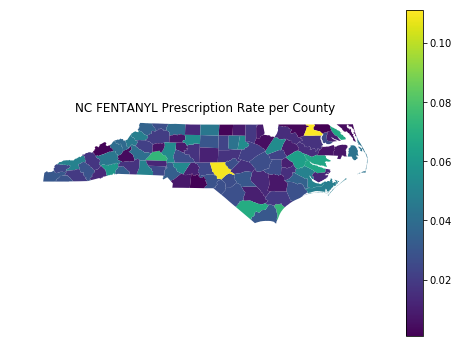

In [274]:
xxxxx[xxxxx['Product_Basename']=='FENTANYL'].plot(column='trxrate',legend = True)
plt.title('NC FENTANYL Prescription Rate per County')
plt.axis('off')
#plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [273]:
xxxxx[xxxxx['Product_Basename']=='FENTANYL'].sort_values(['trxrate'],ascending=False).head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Product_Basename,state,county,total,pop,ct,trxrate
1249,37,091,01026127,0500000US37091,37091,Hertford,06,914685904,18740844,"POLYGON ((-77.208606 36.246838, -77.1990409999...",FENTANYL,NC,Hertford,3113.814,28046.0,Hertford,0.111025
406,37,125,01008573,0500000US37125,37125,Moore,06,1806961891,20736340,"POLYGON ((-79.767957 35.511484, -79.724457 35....",FENTANYL,NC,Moore,9788.830,89489.0,Moore,0.109386
316,37,129,01026329,0500000US37129,37129,New Hanover,06,497789754,353951640,"POLYGON ((-78.029922 34.331768, -77.993202 34....",FENTANYL,NC,New Hanover,16225.064,218510.0,New Hanover,0.074253
679,37,035,01008543,0500000US37035,37035,Catawba,06,1039550614,37945362,"POLYGON ((-81.53419699999999 35.570335, -81.50...",FENTANYL,NC,Catawba,12043.976,163398.0,Catawba,0.073709
522,37,047,01026339,0500000US37047,37047,Columbus,06,2429714643,43719396,"POLYGON ((-79.0712438523822 34.29930291305701,...",FENTANYL,NC,Columbus,3915.981,56975.0,Columbus,0.068732


# Top four trx distribution in NC

In [276]:
# top four opioid drug list
opioid=['OXYCODONE','OXYCONTIN','OPANA','FENTANYL']

In [ ]:
for i in PB:
    xxxxx[xxxxx['Product_Basename']==i].plot(column='trxrate',legend = True)
    plt.title('NC {0} Prescription Rate per County'.format(i))
    plt.axis('off')
    #plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [ ]:
for i in PB:
    ma_trx_ct[ma_trx_ct['Product_Basename']==i].plot(column='total',legend = True)

In [ ]:
PB

In [ ]:
for i in PB:
    if sum(ma_trx_ct['Product_Basename']==i):
        ma_trx_ct[ma_trx_ct['Product_Basename']==i].plot(column='total',legend = True)
        plt.title('MA {0} Prescription Rate per County'.format(i))
        plt.axis('off')
        plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [ ]:
for i in PB:
    if sum(or_trx_ct['Product_Basename']==i):
        or_trx_ct[or_trx_ct['Product_Basename']==i].plot(column='total',legend = True)
        plt.title('OR {0} Prescription Rate per County'.format(i))
        plt.axis('off')
        plt.rcParams["figure.figsize"] = [8.0,6.0]
#plt.savefig("test.png", bbox_inches='tight')
#plt.savefig(r'E:\Bootcamp_Summer_Project\NC Rate.png',dpi=100)
plt.show()

In [ ]:
or_trx_ct